In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Utils import Processing
from Models import ANN_1

from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

importlib.reload(Processing)
importlib.reload(ANN_1)

2023-10-01 14:10:34.321141: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 14:10:34.352451: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 14:10:34.352483: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 14:10:34.352506: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-01 14:10:34.358598: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 14:10:34.359014: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

<module 'Models.ANN_1' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/ANN_1.py'>

In [2]:
class_weight=Processing.class_weights()
class_weight

{'ModerateDemented': 1.0,
 'VeryMildDemented': 0.008885850991114148,
 'MildDemented': 0.05329445078399054,
 'NonDemented': 0.0}

In [3]:
X_train = np.load('PCA_Data/X_train_pca.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_test = np.load('PCA_Data/labels_list_test.npy')

In [4]:
y_train = y_train ** 0.1
y_train

array([[0.74587869],
       [0.62354802],
       [0.62354802],
       ...,
       [0.62354802],
       [0.62354802],
       [0.74587869]])

In [5]:
y_train.max()

1.0

In [6]:
#df_label_weight = pd.DataFrame(labels_train)
#df_label_weight

In [7]:
# normalize with min-max normalization using sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
# X_train = X_train.reshape(-1, 27, 27)
# X_test = X_test.reshape(-1, 27, 27)
# normalize each image with min-max normalization
#for i in range(len(X_train)):
#    max = X_train[i].max()
#    min = X_train[i].min()
#    X_train[i] = (X_train[i] - min) / (max - min)
#
#for i in range(len(X_test)):
#    max = X_test[i].max()
#    min = X_test[i].min()
#    X_test[i] = (X_test[i] - min) / (max - min)

In [9]:
validation_percentage = 0.5
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_val = labels_train[int(1-validation_percentage * len(labels_train)):]
labels_train = labels_train[:int(1-validation_percentage * len(labels_train))]

In [10]:
# one hot encoding df_labels_
df_labels_train = pd.DataFrame(labels_train, columns=['label'])
df_labels_train = pd.get_dummies(df_labels_train['label'])
df_labels_train = df_labels_train.astype(int)
df_labels_train = df_labels_train[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

df_labels_val = pd.DataFrame(labels_val, columns=['label'])
df_labels_val = pd.get_dummies(df_labels_val['label'])
df_labels_val = df_labels_val.astype(int)
df_labels_val = df_labels_val[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

df_labels_test = pd.DataFrame(labels_test, columns=['label'])
df_labels_test = pd.get_dummies(df_labels_test['label'])
df_labels_test = df_labels_test.astype(int)
df_labels_test = df_labels_test[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

In [11]:
df_train = pd.DataFrame(X_train)
df_val = pd.DataFrame(X_val)
df_test = pd.DataFrame(X_test)

In [12]:
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_val_scaled = pd.DataFrame(scaler.transform(df_val))
df_test_scaled = pd.DataFrame(scaler.transform(df_test))

In [13]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,-0.679516,0.009893,-0.772439,0.399707,1.147609,-0.258136,-0.179097,0.106501,-0.545358,0.211390,...,-0.399347,-0.477501,1.949948,1.545586,-1.111217,-1.021542,-1.315842,-0.376497,0.381980,-0.387918
1,-0.212022,-0.950237,-1.334794,-0.564601,0.374589,-1.314234,0.079849,2.411654,-0.569428,-2.019876,...,-1.104447,-0.214066,-0.326975,-0.053153,-0.144306,0.649506,0.116568,0.052974,1.047673,0.525500
2,1.600569,0.714565,0.493042,-1.622309,-0.620615,-1.415203,-0.889979,-0.718949,0.978008,0.331619,...,-0.449442,-0.510083,0.130651,0.498805,-0.772928,-0.423373,-0.967058,-0.368068,-2.217040,0.957270
3,-0.700215,2.219761,0.038706,-1.180016,0.290513,1.418285,1.064722,2.057123,0.923677,-0.290236,...,-1.372191,0.298311,-0.149917,-1.012201,-1.263251,-0.379964,1.242228,1.762233,0.460587,-0.926380
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,1.070932,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,0.983489,-2.119878,0.926924,0.019025,1.101508,2.013256,-0.571810,0.934419,1.027950,2.545092,...,0.789166,1.108572,0.521303,-1.509278,0.796519,1.007905,0.152908,-0.018276,0.277466,0.848824
2558,-1.105541,1.010022,-0.271332,0.077020,0.964062,0.935141,0.745150,0.867835,-0.235276,1.126479,...,0.323204,0.788777,-1.130922,0.278074,-0.855852,-1.038941,-0.091863,0.040030,0.554795,0.182240
2559,-0.672872,1.443915,-0.233345,0.174740,1.198415,-0.224962,-0.740374,2.185965,-1.344516,0.356606,...,-0.452113,-1.050842,-0.283656,0.693515,-0.160676,0.523398,-0.551971,0.071084,1.962421,0.173236
2560,1.484038,-0.752901,1.662007,0.814870,1.760754,1.584395,-0.622803,0.469173,-0.288723,1.250041,...,-0.851404,0.138356,-0.169623,-0.424483,-1.138045,-0.462416,-0.342190,-0.849653,-0.733235,0.884880


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)

(2562, 729)
(2562, 1)
(2559, 729)
(1279, 729)


In [15]:
print(len(df_train_scaled))
print(len(df_val_scaled))

2562
2559


In [16]:
#importlib.reload(ConvMassimo)
#model = ConvMassimo.build_Model(input_shape=(27,27,1))
#model.summary()

In [17]:
import pygad

In [18]:
n_elements = len(y_train)
print("n_elements = ", n_elements)
n_generations = 15
initial_genes_values = y_train

n_elements =  2562


In [19]:
last_fitness = 0
solution = None

def on_start(ga_instance):
    pass
    #print("on_start()")

def on_fitness(ga_instance, population_fitness):
    pass
    #print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    pass
    #print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    pass
    #print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    pass
    #print("on_mutation()")

def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}, Best Fitness = {fitness}, Change = {change}".format(
        generation=ga_instance.generations_completed,
        fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1],
        change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness
        )
    )
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

def on_stop(ga_instance, last_population_fitness):
    global solution
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    if ga_instance.best_solution_generation != -1:
        print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))
        print("Parameters of the best solution : {solution}".format(solution=solution))

In [20]:
def fitness_func(ga_instance, solution, solution_idx):
    model = ANN_1.build_Model(input_shape=(27 * 27))
    global df_train_scaled
    global df_labels_train
    global df_val_scaled
    global df_labels_val
    hystory = model.fit(
        x= df_train_scaled.values,
        y= df_labels_train.values,
        epochs=25,
        batch_size=128,
        shuffle=True,
        verbose=0,
        validation_data=(df_val_scaled.values, df_labels_val.values),
        sample_weight=solution
    )
    accuracy = hystory.history['categorical_accuracy'][-1]
    val_accuracy = hystory.history['val_categorical_accuracy'][-1]

    fitness = (accuracy + val_accuracy) - np.abs(accuracy - val_accuracy) # TO MAXIMIZE

    return fitness

In [21]:
num_generations = n_generations
num_parents_mating = 5

fitness_function = fitness_func

sol_per_pop = 10
num_genes = n_elements

init_range_low = 0
init_range_high = 1

parent_selection_type = "sss"
keep_parents = 2 #-1 

crossover_type = "uniform"
crossover_probability=0.75

mutation_type = "random"
mutation_probability = 0.5

random_mutation_min_val=0.001
random_mutation_max_val=0.25

In [22]:
gene_space = []

for i in range(0,num_genes):
    gene_space.append({"low":0, "high":1,"step": 0.01})

In [23]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       #mutation_percent_genes=mutation_percent_genes,
                       parallel_processing = ['thread', 8],
                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_parents=on_parents,
                       on_crossover=on_crossover,
                       on_mutation=on_mutation,
                       on_generation=on_generation,
                       on_stop=on_stop,
                       #stop_criteria=["saturate_15"],
                       allow_duplicate_genes=True,
                       gene_space = gene_space,
                       #save_solutions=True,
                       random_mutation_min_val= random_mutation_min_val,
                       random_mutation_max_val= random_mutation_max_val,
                       gene_type = float )
                       #with precision, for every gene gene_type=[int, float, numpy.float16, numpy.int8, numpy.float]
                       #gene_type=float)

In [24]:
ga_instance.run()

Generation = 1, Best Fitness = 0.8143806457519531, Change = 0.8143806457519531
Generation = 2, Best Fitness = 0.8284485936164856, Change = 0.01406794786453247
Generation = 3, Best Fitness = 0.8284485936164856, Change = 0.0
Generation = 4, Best Fitness = 0.8292301893234253, Change = 0.0007815957069396973
Generation = 5, Best Fitness = 0.8292301893234253, Change = 0.0
Generation = 6, Best Fitness = 0.8292301893234253, Change = 0.0
Generation = 7, Best Fitness = 0.8292301893234253, Change = 0.0
Generation = 8, Best Fitness = 0.8292301893234253, Change = 0.0


KeyboardInterrupt: 

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
if ga_instance.best_solution_generation != -1:    
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))


Parameters of the best solution : [0.56 0.63 0.34 ... 0.12 0.83 0.85]
Fitness value of the best solution = 1.0068720163316094
Index of the best solution : 4
Best fitness value reached after 10 generations.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


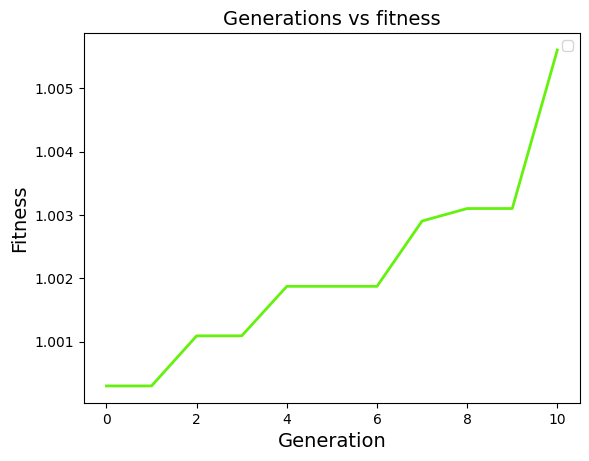

In [ ]:
ga_instance.plot_fitness(plot_type="plot", linewidth=2, title="Generations vs fitness");

In [ ]:
importlib.reload(ANN_1)
model = ANN_1.build_Model(input_shape=(27 * 27))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 729)]             0         
                                                                 
 flatten (Flatten)           (None, 729)               0         
                                                                 
 dense (Dense)               (None, 300)               219000    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               60200 

In [ ]:
hystory = model.fit(
    x=df_train_scaled.values,
    y=df_labels_train.values,
    epochs=50,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(df_val_scaled.values, df_labels_val.values),
    sample_weight=solution
)

Epoch 1/50
41/41 [==============================] - 1s 9ms/step - loss: 14.9994 - categorical_accuracy: 0.2705 - val_loss: 15.1514 - val_categorical_accuracy: 0.3243
Epoch 2/50
41/41 [==============================] - 0s 7ms/step - loss: 14.1081 - categorical_accuracy: 0.3205 - val_loss: 14.2718 - val_categorical_accuracy: 0.3849
Epoch 3/50
41/41 [==============================] - 0s 8ms/step - loss: 13.2699 - categorical_accuracy: 0.3493 - val_loss: 13.4408 - val_categorical_accuracy: 0.4228
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 12.4555 - categorical_accuracy: 0.4032 - val_loss: 12.6521 - val_categorical_accuracy: 0.4455
Epoch 5/50
41/41 [==============================] - 0s 6ms/step - loss: 11.6964 - categorical_accuracy: 0.4176 - val_loss: 11.8971 - val_categorical_accuracy: 0.4615
Epoch 6/50
41/41 [==============================] - 0s 6ms/step - loss: 10.9614 - categorical_accuracy: 0.4496 - val_loss: 11.1719 - val_categorical_accuracy: 0.4736
Epoc

<Axes: title={'center': 'Hystory Accuracy'}>

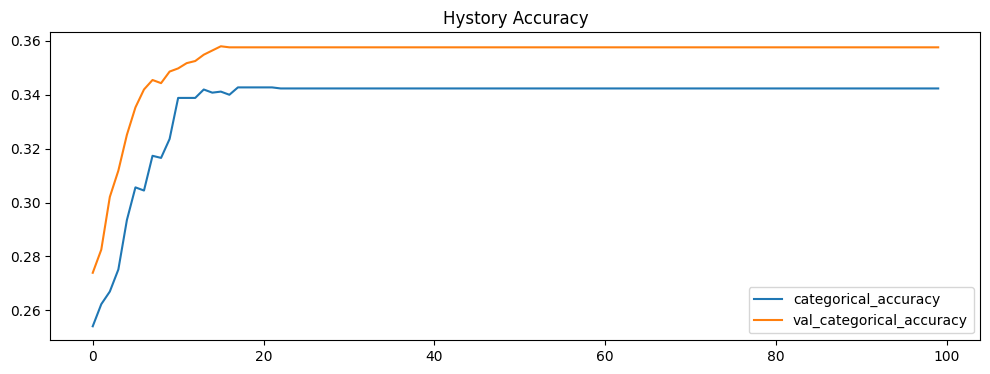

In [ ]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory[['categorical_accuracy','val_categorical_accuracy']].plot(figsize=(12, 4), title='Hystory Accuracy')

<Axes: title={'center': 'Hystory Loss'}>

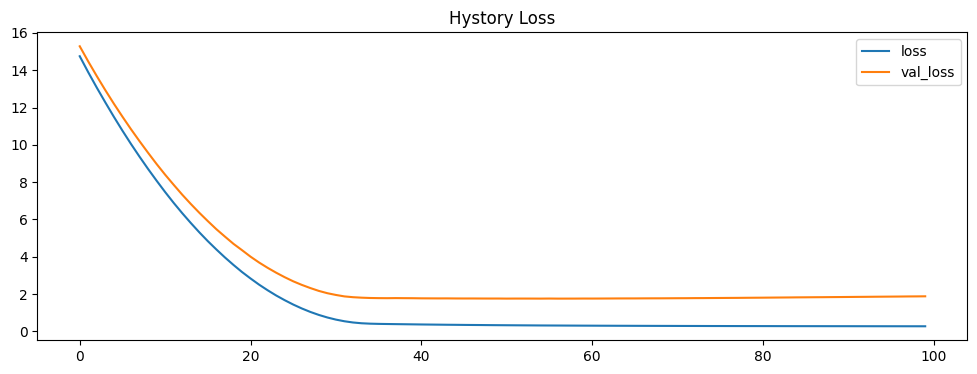

In [ ]:
df_hystory[['loss','val_loss']].plot(figsize=(12, 4), title='Hystory Loss')

In [ ]:
predictions = model.predict(X_test)
df_predictions = pd.DataFrame(predictions, columns=['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
df_predictions

40/40 [==============================] - 0s 1ms/step


,NonDemented,VeryMildDemented,MildDemented,ModerateDemented
0,0.048710,0.602620,0.286441,0.062229
1,0.048710,0.602618,0.286442,0.062230
2,0.048704,0.602648,0.286423,0.062225
3,0.048705,0.602644,0.286426,0.062225
4,0.048711,0.602617,0.286443,0.062230
...,...,...,...,...
1274,0.048710,0.602616,0.286444,0.062230
1275,0.048704,0.602649,0.286422,0.062224
1276,0.048707,0.602633,0.286432,0.062227
1277,0.048710,0.602621,0.286440,0.062229


In [ ]:
# convert df_predictions to labels
labels_predictions = []
for i in range(len(df_predictions)):
    labels_predictions.append(df_predictions.iloc[i].idxmax())
labels_predictions = np.array(labels_predictions)
labels_predictions

array(['VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', ...,
       'VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented'],
      dtype='<U16')

In [ ]:
# compute classification metrics
print(classification_report(labels_test, labels_predictions))

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.00      0.00      0.00       640
VeryMildDemented       0.35      1.00      0.52       448

        accuracy                           0.35      1279
       macro avg       0.09      0.25      0.13      1279
    weighted avg       0.12      0.35      0.18      1279



/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

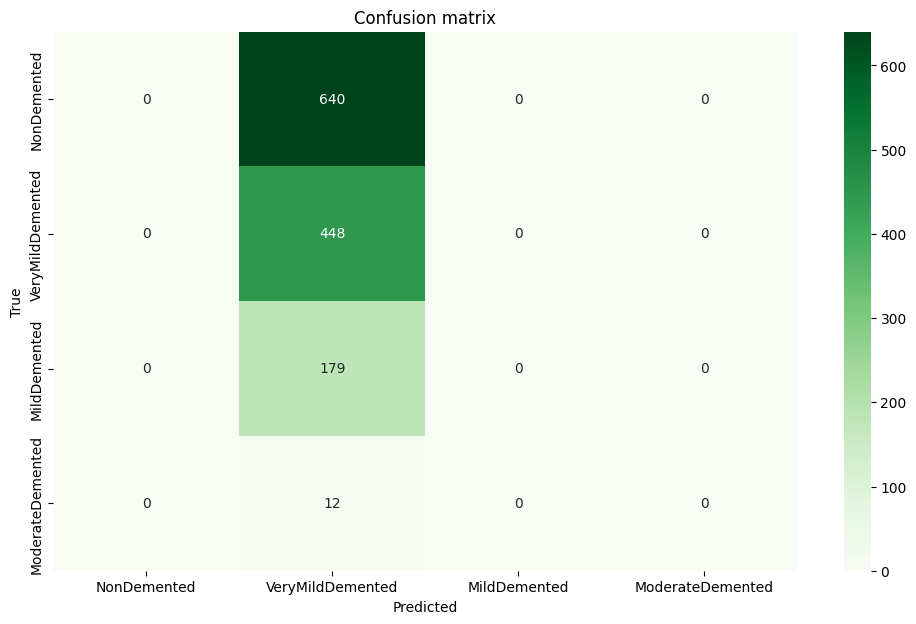

In [ ]:
# confusion matrix
cm = confusion_matrix(labels_test, labels_predictions, labels=['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.xticks(np.arange(4) + 0.5, ['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.yticks(np.arange(4) + 0.5, ['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.show()